TWO LAYERS

In [23]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)



mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [2]:
train__ = mat_data["S"][0][0]

train__ = torch.tensor(train__)

In [3]:
opto = mat_data["opt"][0][0]

In [34]:
m, k1, k2 = 101, 50, 5
net = Neural_NMF([m, k1, k2])

In [35]:
history = train(net, train__, epoch=100, lr=500, supervised=False)

100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


In [36]:
history[1][1].shape

torch.Size([5, 5957])

In [37]:
A = history[0][1]
S = history[1][1]

In [38]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

In [39]:
A1.shape

(50, 5)

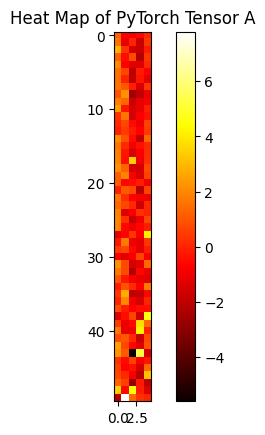

In [40]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

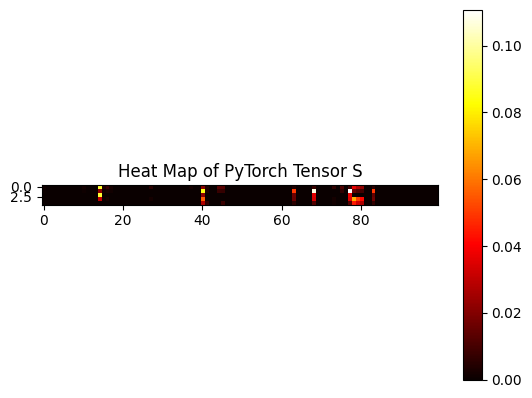

In [41]:
plt.imshow(S1[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [42]:
import numpy as np
opto = np.array(opto)

In [43]:
count_ones = np.count_nonzero(opto == 1)
count_ones

95

In [44]:
indices = np.where(opto == 1)[1]

In [45]:
ABC = S1[:,indices[0]:indices[0]+100]

In [46]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 10 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+10])
    else:
        slices.append(S1[:, idx:])

In [47]:
C = np.hstack(slices) if slices else np.array([])

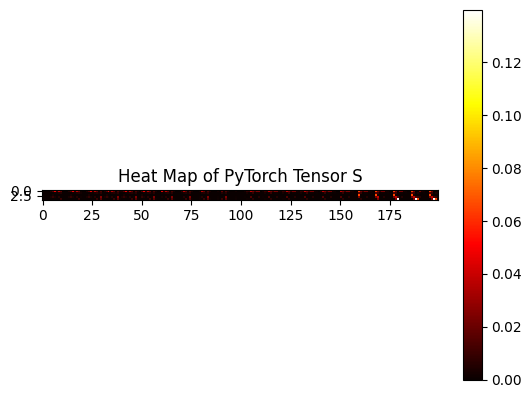

In [51]:
plt.imshow(C[:,-200:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()